# **Chatbot With Neural Network**

<b>Chatbot</b> merupakan bagian dari Natural Language Processing yang digunakan untuk percakapan dengan pengguna melalui teks dan ucapan. Pada praktik hari ini kita akan membuat sebuah chat otomatis atau chatbot tentang program Kampus Merdeka dari Kementerian Pendidikan Kebudayaan Riset dan Teknologi (KEMENDIKBUDRISTEK).

Dalam tahapan Chatbot ini ada tahapan yang harus kita perhatikan yaitu,

1. Import Library
2. Load Dataset
3. Preprocessing Data
4. Input Length, Output Length and Vocabulary
5. Neural Network Model
6. Model Analysis
7. Testing
8. Save Model

Dalam proyek ini, kita akan membuat chatbot tentang program Kampus Merdeka!

Sumber code: [Medium - Going Merry With Tensorflow 2.0](https://medium.com/analytics-vidhya/chatbot-with-tensorflow-2-0-going-merry-2f79284a6104)

# **Load Google Drive**

Setelah kita mengunduh dataset dengan library request url dari link yang kita ketahui maka kita akan menyimpan file data yang kita download di Google Drive dengan dengan cara klik pada menu "**Mount Drive**" maka akan keluar code dibawah ini.

**Notes:** Mohon dirunning terlebih dahulu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install SpeechRecognition

     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [ ]:
!pip -q install gtts

# **Import Library**

Tahapan pertama sebelum melakukan eksplorasi dan praproses pada data adalah memasukan library yang akan digunakan untuk menganalisa dataset dengan menggunakan metode Deep Learning seperti Neural Network dalam pengolahan teks, Chatbot dll. Library yang saya gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta Tensorflow untuk model pada data menggunakan algoritma LSTM dan Jaringan Syaraf Tiruan (Neural Network).

In [ ]:
# Import Libraries
import json
import nltk
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
from gtts import gTTS
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import speech_recognition as sr 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

## **Download NLTK Package**

In [ ]:
# Package sentence tokenizer
nltk.download('punkt')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Load Dataset Json**

In [ ]:
# Importing the dataset
with open('/content/drive/MyDrive/NLP/pulmobot/PulmoBot.json') as content:
  datapnm = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata 
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter

for intent in datapnm['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
# Cetak data keseluruhan
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
108,Komplikasi paru paru basah?,Komplikasi_Pneumonia
109,Komplikasi radang paru-paru?,Komplikasi_Pneumonia
110,Komplikasi radang paru paru?,Komplikasi_Pneumonia
111,Komplikasinya bagaimana?,Komplikasi_Pneumonia


In [ ]:
# # Cetak data baris pertama sampai baris kelima
data.head()

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting


In [ ]:
# Cetak data baris ke-70 sampai baris akhir
data.tail()

,patterns,tags
108,Komplikasi paru paru basah?,Komplikasi_Pneumonia
109,Komplikasi radang paru-paru?,Komplikasi_Pneumonia
110,Komplikasi radang paru paru?,Komplikasi_Pneumonia
111,Komplikasinya bagaimana?,Komplikasi_Pneumonia
112,Komplikasi?,Komplikasi_Pneumonia


Data yang telah kita miliki dalam format JSON yang dapat digunakan melalui pandas dengan cara konversi. Data JSON yang saya miliki didapat dengan cara manual dengan mengambil beberapa referensi website tentang program Kampus Merdeka.

# **Preprocessing The Data**

## *Remove Punctuations*

In [ ]:
# Removing Punctuations (Menghilangkan Punktuasi)
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

##*Lemmatization (Lematisasi)*

In [ ]:
# Lematisasi atau Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)


62 unique lemmatized words ['adalah', 'afternoon', 'apa', 'bagaimana', 'bai', 'banyak', 'basah', 'berat', 'bro', 'bye', 'byee', 'cara', 'dadah', 'dah', 'gejala', 'gejalanya', 'good', 'hai', 'hallo', 'halo', 'hei', 'hi', 'hy', 'info', 'itu', 'jumpa', 'kasih', 'kawan', 'komplikasi', 'komplikasinya', 'lainnya', 'makasih', 'malam', 'menghindarinya', 'morning', 'p', 'pagi', 'paru', 'paru-paru', 'pencegahan', 'pencegahannya', 'pengobatan', 'pengobatannya', 'penyebab', 'penyebabnya', 'pneumonia', 'radang', 'ringan', 'saja', 'sampai', 'see', 'selamat', 'si', 'siang', 'sore', 'tambahan', 'tentang', 'terima', 'thank', 'thanks', 'tinggal', 'you']


Menyortir Data Kelas Tags

In [ ]:
# sort classes
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

12 classes ['Gejala_Pneumonia', 'Info_Tambahan_Pneumonia', 'Komplikasi_Pneumonia', 'Pencegahan_Pneumonia', 'Pengobatan_Gejala_Berat_Pneumonia', 'Pengobatan_Gejala_Ringan_Pneumonia', 'Pengobatan_Pneumonia', 'Penjelasan_Pneumonia', 'Penyebab_Pneumonia', 'goodbye', 'greeting', 'terimakasih']


Mencari Jumlah Keseluruhan Data Teks

In [ ]:
# documents = combination between patterns and intents
print (len(documents), "documents")

1167 documents


## *Tokenization (Tokenisasi)*

In [ ]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [21],
 [50],
 [51, 21],
 [52, 53],
 [54, 55],
 [56],
 [57, 22],
 [58],
 [59, 22],
 [23, 24],
 [60],
 [23, 24, 61],
 [9, 18, 7],
 [7, 19],
 [9, 18, 4, 5],
 [9, 18, 1, 1, 5],
 [4, 5, 19],
 [1, 1, 5, 19],
 [9, 18, 6, 4],
 [9, 18, 6, 1, 1],
 [6, 4, 19],
 [6, 1, 1, 19],
 [6, 4],
 [6, 1, 1],
 [7],
 [4, 5],
 [1, 1, 5],
 [2, 7],
 [9, 25],
 [2, 4, 5],
 [2, 1, 1, 5],
 [2, 6, 4],
 [2, 6, 1, 1],
 [25, 9, 26],
 [2],
 [12, 7],
 [9, 27],
 [12, 4, 5],
 [12, 1, 1, 5],
 [12, 6, 4],
 [12, 6, 1, 1],
 [27, 9, 26],
 [12],
 [3, 7],
 [8, 28],
 [3, 4, 5],
 [3, 1, 1, 5],
 [3, 6, 4],
 [3, 6, 1, 1],
 [28, 8],
 [20, 3],
 [3],
 [3, 2, 10, 7],
 [8, 3, 2, 10],
 [3, 4, 5, 2, 10],
 [3, 1, 1, 5, 2, 10],
 [3, 6, 4, 2, 10],
 [3, 6, 1, 1, 2, 10],
 [3, 2, 10, 8],
 [20, 3, 2, 10],
 [2, 10],
 [3, 2, 11, 7],
 [8, 3, 2, 11],
 [3, 4, 5, 2, 11],
 [3, 1, 1, 5, 2, 11],
 [3, 6, 4, 2, 11],
 [3, 6, 1, 1, 2, 11

## *Padding*

In [ ]:
# Apply padding 
x_train = pad_sequences(train)
print(x_train) # Padding Sequences

[[ 0  0  0  0  0 32]
 [ 0  0  0  0  0 33]
 [ 0  0  0  0  0 34]
 [ 0  0  0  0  0 35]
 [ 0  0  0  0  0 36]
 [ 0  0  0  0  0 37]
 [ 0  0  0  0  0 38]
 [ 0  0  0  0  0 39]
 [ 0  0  0  0  0 40]
 [ 0  0  0  0  0 41]
 [ 0  0  0  0  0 42]
 [ 0  0  0  0  0 43]
 [ 0  0  0  0  0 44]
 [ 0  0  0  0  0 45]
 [ 0  0  0  0  0 46]
 [ 0  0  0  0  0 47]
 [ 0  0  0  0  0 48]
 [ 0  0  0  0  0 49]
 [ 0  0  0  0  0 21]
 [ 0  0  0  0  0 50]
 [ 0  0  0  0 51 21]
 [ 0  0  0  0 52 53]
 [ 0  0  0  0 54 55]
 [ 0  0  0  0  0 56]
 [ 0  0  0  0 57 22]
 [ 0  0  0  0  0 58]
 [ 0  0  0  0 59 22]
 [ 0  0  0  0 23 24]
 [ 0  0  0  0  0 60]
 [ 0  0  0 23 24 61]
 [ 0  0  0  9 18  7]
 [ 0  0  0  0  7 19]
 [ 0  0  9 18  4  5]
 [ 0  9 18  1  1  5]
 [ 0  0  0  4  5 19]
 [ 0  0  1  1  5 19]
 [ 0  0  9 18  6  4]
 [ 0  9 18  6  1  1]
 [ 0  0  0  6  4 19]
 [ 0  0  6  1  1 19]
 [ 0  0  0  0  6  4]
 [ 0  0  0  6  1  1]
 [ 0  0  0  0  0  7]
 [ 0  0  0  0  4  5]
 [ 0  0  0  1  1  5]
 [ 0  0  0  0  2  7]
 [ 0  0  0  0  9 25]
 [ 0  0  0  2

## *Encoding*

In [ ]:
# Encoding the outputs 
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9
  9 11 11 11 11 11  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  0  0  0
  0  0  0  0  0  8  8  8  8  8  8  8  8  6  6  6  6  6  6  6  6  6  5  5
  5  5  5  5  5  5  5  4  4  4  4  4  4  4  4  4  3  3  3  3  3  3  3  3
  3  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2]


# **Input Length, Output Length and Vocabulary**

In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

6


In [ ]:
# define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  62
output length:  12


## **Save Model Words & Classes**

In [ ]:
pickle.dump(words, open('/content/drive/MyDrive/NLP/pulmobot/model/words.pkl','wb'))
pickle.dump(classes, open('/content/drive/MyDrive/NLP/pulmobot/model/classes.pkl','wb'))

## **Save Label Encoder & Tokenizer**

In [ ]:
pickle.dump(le, open('/content/drive/MyDrive/NLP/pulmobot/model/le.pkl','wb'))
pickle.dump(tokenizer, open('/content/drive/MyDrive/NLP/pulmobot/model/tokenizers.pkl','wb'))

# **Neural Network Model**

In [ ]:
# Creating the model (Membuat Modeling)
i = tf.keras.layers.Input(shape=(6,), name='input_ids', dtype='int32')
x = Embedding(vocabulary+1,10)(i) # Layer Embedding
x = LSTM(10, return_sequences=True)(x) # Layer Long Short Term Memory
x = Flatten()(x) # Layer Flatten
x = Dense(output_length, activation="softmax")(x) # Layer Dense
model  = Model(i,x)

# Compiling the model (Kompilasi Model)
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

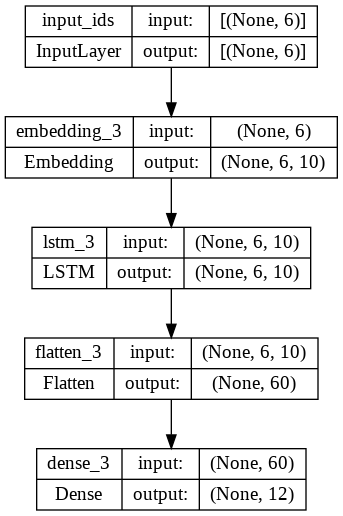

In [ ]:
#Visualization Plot Architecture Model (Visualisasi Plot Arsitektur Model)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Menampilkan Parameter Model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 6)]               0         
                                                                 
 embedding_3 (Embedding)     (None, 6, 10)             630       
                                                                 
 lstm_3 (LSTM)               (None, 6, 10)             840       
                                                                 
 flatten_3 (Flatten)         (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                732       
                                                                 
Total params: 2,202
Trainable params: 2,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model (Latih model data sampai 400 kali)
train = model.fit(x_train, y_train, epochs=400)

Epoch 1/400
4/4 [==============================] - 8s 6ms/step - loss: 2.4865 - accuracy: 0.0708
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 2.4839 - accuracy: 0.1062
Epoch 3/400
4/4 [==============================] - 0s 5ms/step - loss: 2.4814 - accuracy: 0.1681
Epoch 4/400
4/4 [==============================] - 0s 5ms/step - loss: 2.4793 - accuracy: 0.1681
Epoch 5/400
4/4 [==============================] - 0s 6ms/step - loss: 2.4770 - accuracy: 0.1504
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 2.4747 - accuracy: 0.1327
Epoch 7/400
4/4 [==============================] - 0s 5ms/step - loss: 2.4723 - accuracy: 0.1327
Epoch 8/400
4/4 [==============================] - 0s 6ms/step - loss: 2.4694 - accuracy: 0.1327
Epoch 9/400
4/4 [==============================] - 0s 5ms/step - loss: 2.4665 - accuracy: 0.1327
Epoch 10/400
4/4 [==============================] - 0s 6ms/step - loss: 2.4632 - accuracy: 0.1327
Epoch 11/400
4/4 [===========

# **Model Analysis**

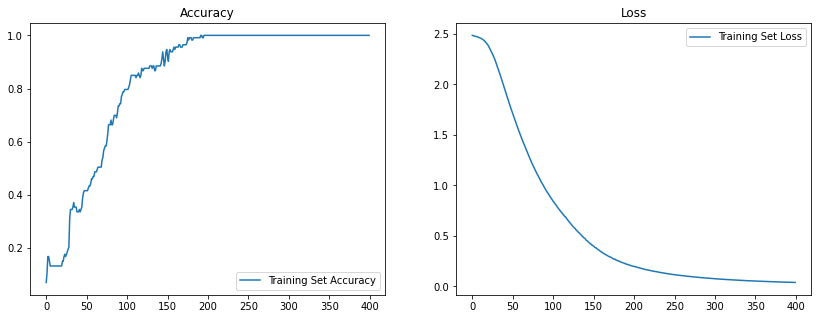

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# **Testing Chatbot Dan Tambahkan Suara Pada Chatbot**

In [ ]:
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('👨‍🦰 Kamu : ')
  
  # Menghapus punktuasi dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil keluaran pada model 
  output = model.predict(prediction_input)
  output = output.argmax()

# Menemukan respon sesuai data tag dan memainkan voice bot
  response_tag = le.inverse_transform([output])[0]
  print("🤖 Pulmobot : ", random.choice(responses[response_tag]))
  tts = gTTS(random.choice(responses[response_tag]), lang='id')

  # Simpan model voice bot ke dalam Google Drive
  tts.save('/content/drive/MyDrive/NLP/pulmobot/model/Pulmobot.wav')
  time.sleep(0.08)

  # Load model voice bot from Google Drive
  ipd.display(ipd.Audio('/content/drive/MyDrive/NLP/pulmobot/model/Pulmobot.wav', autoplay=False))
  print("="*60 + "\n")

  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break


👨‍🦰 Kamu : pneumonia
1/1 [==============================] - 0s 15ms/step
🤖 Pulmobot :  Pneumonia atau paru-paru basah atau disebut juga radang paru-paru adalah infeksi paru-paru yang disebabkan oleh bakteri, virus, jamur atau parasit.



👨‍🦰 Kamu : dah
1/1 [==============================] - 0s 16ms/step
🤖 Pulmobot :  Bye!


# **Save The Model**

In [ ]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('/content/drive/MyDrive/NLP/pulmobot/model/model.h5')

print('Model Created Successfully!')

Model Created Successfully!
